# Machine Learning in Go
---

## What is Machine Learning? 
---
Machine learning is teaching a program to recognize patterns. These patterns, once recognized can predict similar outcomes with extreme accuracy. 

There are several steps to building a Machine Learning model. These steps can be accomplished in almost every programming language. Languages like Python and R that have strong mathematical tooling are popular in the Machine Learning community and many libraries have been created to facilitate building these models.

Go has a lot of benefits for machine learning. It has strong data typing, it is easily build and deployed. It also allows for concurrecy, which is important to processing large data sets. 

The plan is to run through setting up, training and testing a model in go. 

## Understanding Data
---
Start by accessing your data. 

In [13]:
import (
    "os"
    "bufio"
    "github.com/kniren/gota/dataframe"
    )
    f, err := os.Open("data/magictelescope_csv.csv")
    if err != nil {
        fmt.Println(err)
    }
    r := bufio.NewReader(f)
    df := dataframe.ReadCSV(r)
    df
f.Close()

In [14]:
df.Describe()

[7x13] DataFrame

    column   ID           fLength:   fWidth:    fSize:   fConc:   fConc1:  ...
 0: mean     9510.500000  53.250154  22.180966  2.825017 0.380327 0.214657 ...
 1: stddev   5490.745396  42.364855  18.346056  0.472599 0.182813 0.110511 ...
 2: min      1.000000     4.283500   0.000000   1.941300 0.013100 0.000300 ...
 3: 25%      4755.000000  24.336000  11.863500  2.477100 0.235800 0.128400 ...
 4: 50%      9510.000000  37.146400  17.139200  2.739600 0.354100 0.196500 ...
 5: 75%      14265.000000 70.117500  24.739000  3.101600 0.503700 0.285200 ...
 6: max      19020.000000 334.177000 256.382000 5.323300 0.893000 0.675200 ...
    <string> <float>      <float>    <float>    <float>  <float>  <float>  ...

Not Showing: fAsym: <float>, fM3Long: <float>, fM3Trans: <float>, fAlpha: <float>,
fDist: <float>, class: <string>


Put data into memory

In [25]:
import (
    "bytes"
    "fmt"
    "encoding/csv"
    "gonum.org/v1/plot"
    "gonum.org/v1/plot/vg"
    "gonum.org/v1/plot/plotter"
    "strconv"
)

type GammaImage struct {
    ID int
    FLength float64
    FWidth float64
    FSize float64
    FConc float64
    FConcl float64
    FAsym float64
    FM3Long float64
    FM3Trans float64
    FAlpha float64
    FDist float64
    Class string
}
f, err := os.Open("data/magictelescope_csv.csv")
    if err != nil {
        fmt.Println(err)
    }
reader := csv.NewReader(f)
records, err := reader.ReadAll()
if err != nil {
    fmt.Println(err)
}
size:=len(records)
images := make ([]GammaImage, size)

for idx, img := range records{
    
    if idx != 0 {
        image := GammaImage{
            ID: strconv.Atoi(img[0]),
            FLength: strconv.ParseFloat(img[1], 64),
            FWidth: strconv.ParseFloat(img[2], 64),
            FSize: strconv.ParseFloat(img[3], 64),
            FConc: strconv.ParseFloat(img[4], 64),
            FConcl: strconv.ParseFloat(img[5], 64),
            FAsym: strconv.ParseFloat(img[6], 64),
            FM3Long: strconv.ParseFloat(img[7], 64),
            FM3Trans: strconv.ParseFloat(img[8], 64),
            FAlpha: strconv.ParseFloat(img[9], 64),
            FDist: strconv.ParseFloat(img[10], 64),
            Class: img[11],
        }
        images = append(images, image)
    }
}



// warning: expression returns 2 values, using only the first one: [int error]
// warning: expression returns 2 values, using only the first one: [float64 error]
// warning: expression returns 2 values, using only the first one: [float64 error]
// warning: expression returns 2 values, using only the first one: [float64 error]
// warning: expression returns 2 values, using only the first one: [float64 error]
// warning: expression returns 2 values, using only the first one: [float64 error]
// warning: expression returns 2 values, using only the first one: [float64 error]
// warning: expression returns 2 values, using only the first one: [float64 error]
// warning: expression returns 2 values, using only the first one: [float64 error]
// warning: expression returns 2 values, using only the first one: [float64 error]
// warning: expression returns 2 values, using only the first one: [float64 error]


38041


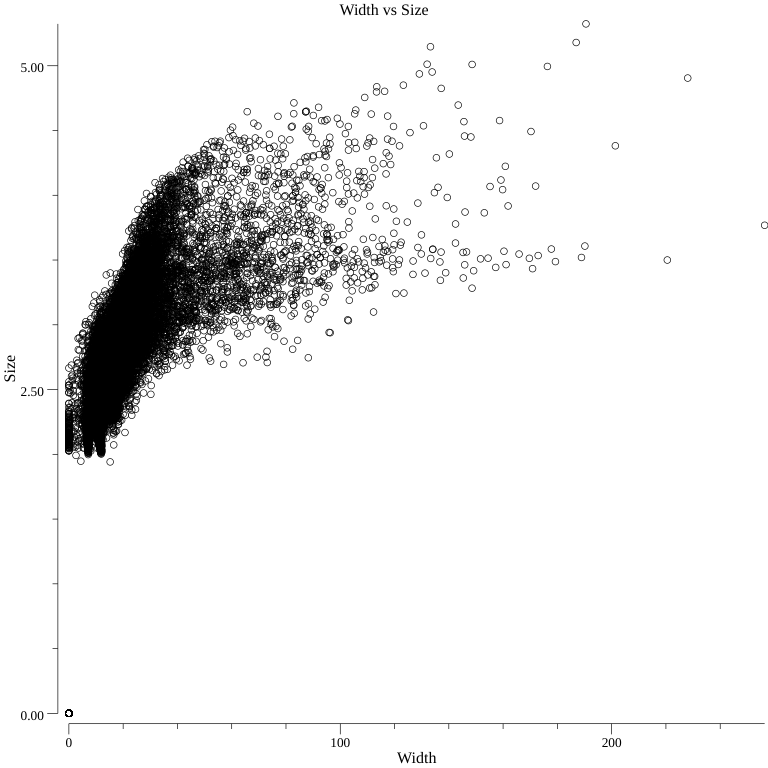

In [31]:
pts := make(plotter.XYs, len(images))
fmt.Println(len(pts))
for i, img := range images{
    pts[i].X = img.FWidth
    pts[i].Y = img.FSize
}

scatter, err := plotter.NewScatter(pts)
    if err != nil {
        fmt.Println(err)
    }
    
p, err := plot.New()
if err != nil {
    fmt.Println(err)
}
p.Title.Text = "Width vs Size"
p.X.Label.Text = "Width"
p.Y.Label.Text = "Size"
p.Add(scatter)
    w, err := p.WriterTo(8*vg.Inch, 8*vg.Inch, "png")
    if err != nil{
        panic(err)
    }
    var b bytes.Buffer
    writer := bufio.NewWriter(&b)
    w.WriteTo(writer)
    Display(display.PNG(b.Bytes()))

Build our classifier

In [ ]:
import "github.com/sjwhitworth/golearn/knn"
import "github.com/sjwhitworth/golearn/base"
import "github.com/sjwhitworth/golearn/evaluation"

dataCSV, err := base.ParseCSVToInstances("data/magictelescope_csv.csv", true)
if err != nil {
fmt.Println(err)
}

k := knn.NewKnnClassifier("euclidean","linear",2)

//Do a training-test split
trainData, testData := base.InstancesTrainTestSplit(dataCSV, 0.75)
k.Fit(trainData)

//Calculates the Euclidean distance and returns the most popular label
predictions, err := k.Predict(testData)
if err != nil {
fmt.Println(err)
}
fmt.Println(predictions)

// Prints precision/recall metrics
confusionMat, err := evaluation.GetConfusionMatrix(testData, predictions)
if err != nil {
        fmt.Println("Unable to get confusion matrix: %s", err.Error())
}



In [12]:
// Close the file.
f.Close()